<a href="https://colab.research.google.com/github/CUKykkim/k8s_object/blob/main/bigdata_engineering_k8s_object.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#kubernetes resource 수행하기

#kubernetes 설정하기

1. docker desktop 수행
1. 설정으로 이동 뒤, kubernetes 탭에서 enable kubernetes 선택

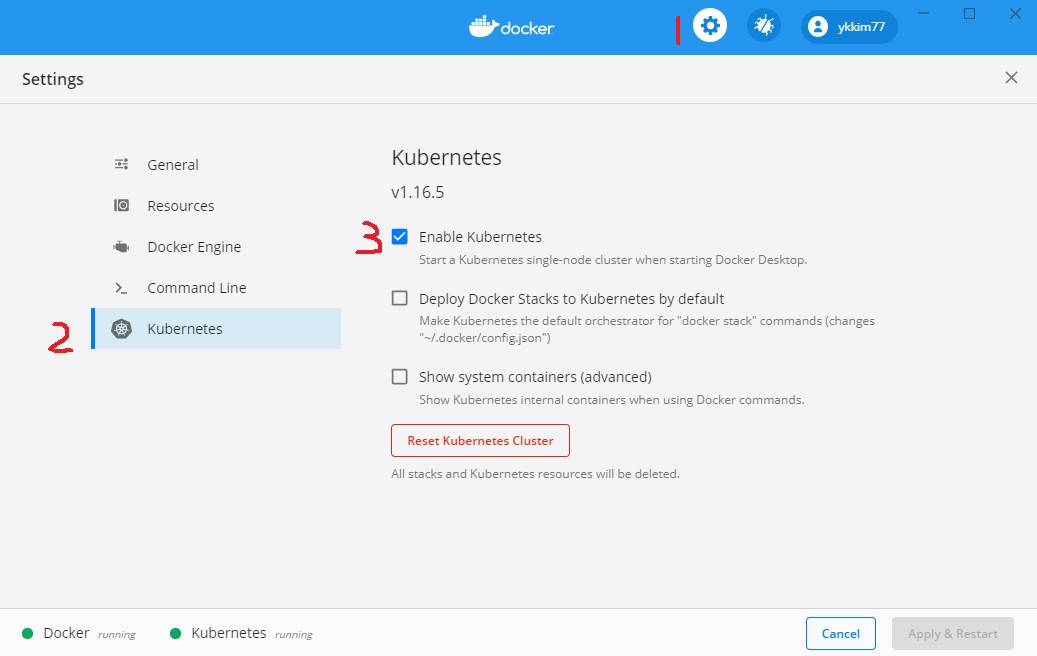



3. windows terminal로 이동 뒤, 아래 명령어를 입력하여, kubernetes 가 시스템에서 제대로 동작하는 지를 확인한다.

```
kubectl version
```

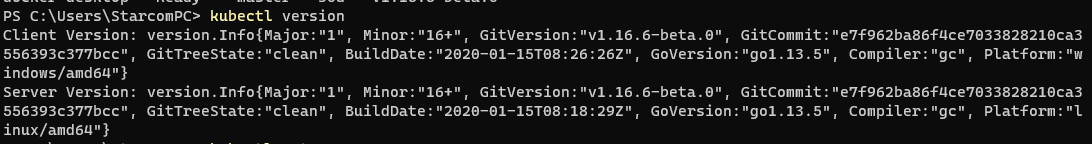


# Pod 수행하기

- nginx pod 명세서 작성하기

 * 우리가 수행할 Pod를 명세하기 위한 yaml 파일을 작성해 준다.

 * nginx 라는 웹서버 소프트웨어를 pod로 수행한다.
 * 이때, 우리가 설치한 우분투 상에서 vi 편집기를 이용해도 좋다.
 

<nginx-pod.yaml>

```
apiVersion: v1
kind: Pod
metadata:
  name: nginx
  labels:
    name: nginx
spec:
  containers:
  - name: nginx
    image: nginx
```




- nginx를 pod로 띄운다

```
kubectl apply -f nginx-pod.yaml
```

- kubectl get pod 명령어로 kubernetes 상의 pod 상태를 확인해 본다

```
kubectl get pod
```


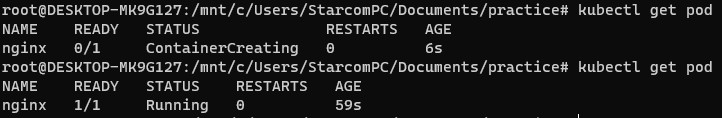

# 서비스 수행하기

- 우리가 수행할 Service를 명세하는 yaml 파일을 작성해 준다.

- my-nginx 라는 웹서버 소프트웨어를 pod로 수행한다.

- 이때, 우리가 설치한 우분투 상에서 vi 편집기를 이용해도 좋다.

이미지 출처: https://bcho.tistory.com/1256

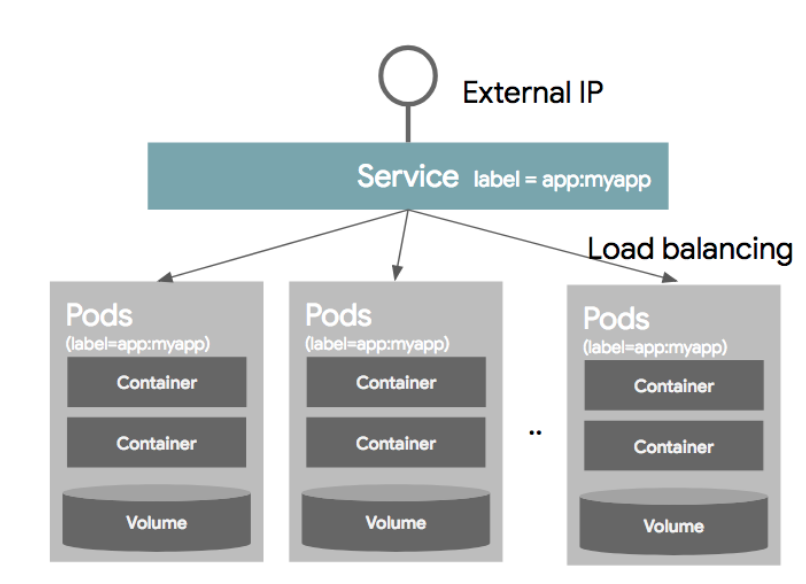


```
apiVersion: v1
kind: Service
metadata:
  name: my-nginx
  labels:
    run: my-nginx
spec:
  ports:
  - port: 80
    protocol: TCP
  selector:
    name: nginx
  type: LoadBalancer
```

# 네임스페이스 생성하기

- kubectl 명령어를 통해 네임스페이스를 생성해 준다.

```
kubectl create namespace cuk
```

- kubectl get 명령어를 통해 생성된 네임스페이스를 확인한다.

```
kubectl get ns
```

# 디플로이먼트 생성하기

- 다음은 디플로이먼트의 예시이다. 예시는 3개의 nginx 파드를 불러오기 위한 레플리카셋을 생성한다.

<nginx-deployment.yaml>

```
apiVersion: apps/v1
kind: Deployment
metadata:
  name: nginx-deployment
  labels:
    app: nginx
spec:
  replicas: 3
  selector:
    matchLabels:
      app: nginx
  template:
    metadata:
      labels:
        app: nginx
    spec:
      containers:
      - name: nginx
        image: nginx:1.14.2
        ports:
        - containerPort: 80
```

- 만약 디플로이먼트가 여전히 생성 중이면, 다음과 유사하게 출력된다.

```
NAME               READY   UP-TO-DATE   AVAILABLE   AGE
nginx-deployment   0/3     0            0           1s
```


- 몇 초 후 kubectl get deployments 를 다시 실행한다. 다음과 유사하게 출력된다.

```
NAME               READY   UP-TO-DATE   AVAILABLE   AGE
nginx-deployment   3/3     3            3           18s
```


## 디플로이먼트 스케일링 하기

다음 명령어를 사용해서 디플로이먼트의 스케일을 할 수 있다.

```
kubectl scale deployment.v1.apps/nginx-deployment --replicas=10
```